In [1]:
import pandas as pd

In [57]:
df = pd.read_csv('CrabAgePrediction.csv')
df.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,F,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9
1,M,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6
2,I,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6
3,F,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10
4,I,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6


In [5]:
df.describe(include='all')

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
count,3893,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000
unique,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1435,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.311306,1.020893,0.349374,23.567275,10.207342,5.136546,6.795844,9.954791
std,NaN,0.300431,0.248233,0.104976,13.891201,6.275275,3.104133,3.943392,3.220967
min,NaN,0.187500,0.137500,0.000000,0.056699,0.028349,0.014175,0.042524,1.000000
25%,NaN,1.125000,0.875000,0.287500,12.672227,5.343881,2.664853,3.713785,8.000000
50%,NaN,1.362500,1.062500,0.362500,22.792998,9.539607,4.861939,6.662133,10.000000
75%,NaN,1.537500,1.200000,0.412500,32.786197,14.273973,7.200773,9.355335,11.000000


In [6]:
df.Sex.value_counts()

M    1435
I    1233
F    1225
Name: Sex, dtype: int64

In [7]:
df.Age.value_counts()

9     640
10    598
8     520
11    459
7     357
12    248
6     241
13    195
14    122
5     107
15     96
16     62
17     54
4      53
18     38
19     31
20     23
21     14
3      13
23      7
22      6
27      2
24      2
2       1
1       1
29      1
25      1
26      1
Name: Age, dtype: int64

The maximum age of a crab can vary widely depending on the species. Some species of crab have very short lifespans, while others can live for several decades.

For example, the common blue crab (Callinectes sapidus) typically lives for 1-3 years in the wild, while the Dungeness crab (Metacarcinus magister) can live up to 10 years. The giant Japanese spider crab (Macrocheira kaempferi) is known to live up to 100 years in the wild.

It's important to note that the lifespan of a crab can be affected by a number of factors, including environmental conditions, predation, and disease. So while some crabs have the potential to live for a long time, many may not reach their maximum lifespan due to these factors.

Crabs have an average lifespan of 3 to 5 years, with some species living up to 30 years.

However, this greatly depends on the species of the crab. There are many different crab species, and their age ranges all vary.

Let's remove the rows where age is above 20, since there is very less entries for the values above 20

In [58]:
df1 = df[df['Age']<20]
df1.shape

(3836, 9)

In [59]:
df.isnull().sum()


Sex               0
Length            0
Diameter          0
Height            0
Weight            0
Shucked Weight    0
Viscera Weight    0
Shell Weight      0
Age               0
dtype: int64

To find outliers in the any column of a Pandas DataFrame, we can use various statistical methods. One common method is to use the interquartile range (IQR) method, which involves calculating the IQR and then identifying any data points that fall more than 1.5 times the IQR below the first quartile (Q1) or above the third quartile (Q3).

In [60]:
# Calculate the first quartile (Q1), third quartile (Q3), and interquartile range (IQR)
# for all columns
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3-Q1
IQR

# Find any data points that fall more than 1.5 times the IQR below Q1 or 
#above Q3 for all columns 
# Find the rows containing outliers in any column
outliers = df1[((df1 < (Q1 - 1.5 * IQR)) | (df1 > (Q3 + 1.5 * IQR))).apply(lambda x: x.any(), axis=1)]

# Remove the outliers from the DataFrame
df2 = df1[~((df1 < (Q1 - 1.5 * IQR)) | (df1 > (Q3 + 1.5 * IQR))).any(axis=1)]

# Print the updated DataFrame and the outliers
print("Outliers:")
print(outliers)
print("\nDataFrame without outliers:")
df2         

C:\Users\ARAVINTH\AppData\Local\Temp\ipykernel_5992\2328167645.py:11: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = df1[((df1 < (Q1 - 1.5 * IQR)) | (df1 > (Q3 + 1.5 * IQR))).apply(lambda x: x.any(), axis=1)]


Outliers:
     Sex  Length  Diameter  Height     Weight  Shucked Weight  Viscera Weight  \
52     I  1.3750    1.1000  0.4125  24.394745        8.845044        4.791066   
55     F  1.7750    1.4125  0.4875  48.945412       18.086981        9.539607   
79     M  1.9375    1.4250  0.5500  57.606184       20.836883       13.480187   
82     M  1.5750    1.2875  0.4000  28.803092       11.949314        6.917278   
84     M  1.8500    1.4500  0.5125  67.500159       23.119017       13.310090   
...   ..     ...       ...     ...        ...             ...             ...   
3810   I  0.4375    0.3250  0.1375   0.893009        0.297670        0.184272   
3815   M  1.8625    1.4625  0.5375  70.845400       26.265812       13.380964   
3818   F  1.2375    1.0000  0.3875  18.271253        6.860579        3.756309   
3862   F  1.7125    1.3125  0.4375  48.477645       15.351254        8.759996   
3867   I  1.0750    0.8500  0.0000  12.133586        5.854172        2.438057   

      Shell Weigh

C:\Users\ARAVINTH\AppData\Local\Temp\ipykernel_5992\2328167645.py:14: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df2 = df1[~((df1 < (Q1 - 1.5 * IQR)) | (df1 > (Q3 + 1.5 * IQR))).any(axis=1)]


,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,F,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9
1,M,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6
2,I,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6
3,F,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10
4,I,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6
...,...,...,...,...,...,...,...,...,...
3888,F,1.4625,1.1375,0.3250,24.819987,11.651644,5.854172,6.378637,8
3889,F,1.5500,1.2125,0.4375,34.458817,15.450477,7.172423,9.780577,10
3890,I,0.6250,0.4625,0.1625,2.012815,0.765436,0.524466,0.637864,5
3891,I,1.0625,0.7750,0.2625,10.347568,4.507570,2.338834,2.976698,6


<AxesSubplot:>

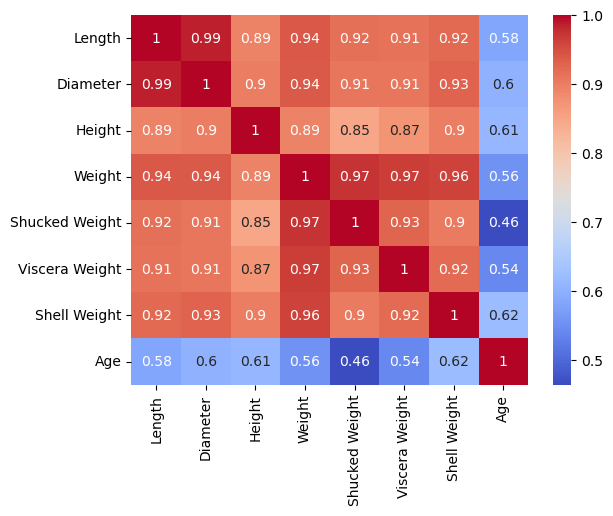

In [12]:
import seaborn as sns

# calculate the correlation matrix
corr_matrix = df2.corr()

# plot the heatmap with values
sns.heatmap(corr_matrix ,cmap='coolwarm',annot=True)

In [61]:
# apply one-hot encoding to the "Sex" column
one_hot_sex = pd.get_dummies(df2.Sex)

# concatenate the one-hot encoded columns with the original DataFrame
df3 = pd.concat([df2,one_hot_sex],axis =1)

# remove the original "Sex" column
df3.drop(columns='Sex',inplace=True)

# view the updated DataFrame
df3.head()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,F,I,M
0,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9,1,0,0
1,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6,0,0,1
2,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6,0,1,0
3,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10,1,0,0
4,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6,0,1,0


StandardScaler is a preprocessing step in machine learning that standardizes features by removing the mean and scaling to unit variance. This is important because many machine learning algorithms assume that the data is normally distributed with zero mean and unit variance. StandardScaler applies the following transformation to each feature:

$$z = \frac{x - \mu}{\sigma}$$

where x is the original feature, μ is the mean of that feature, σ is the standard deviation of that feature, and z is the standardized feature.

Using StandardScaler can improve the performance of many machine learning algorithms, especially those that are sensitive to the scale of the input features, such as gradient descent based algorithms.

In Python, we can use the StandardScaler class from the sklearn.preprocessing module to perform standardization

In [69]:
!pip install scikit-learn --upgrade --quiet

Python was not found; run without arguments to install from the Microsoft Store, or disable this shortcut from Settings > Manage App Execution Aliases.


In [70]:
from sklearn.model_selection import train_test_split

In [79]:
train_df, test_df = train_test_split(df2, test_size=0.2, random_state=42)

In [80]:
print('train_df.shape :', train_df.shape)

print('test_df.shape :', test_df.shape)

train_df.shape : (2819, 9)
test_df.shape : (705, 9)


In [81]:
test_df

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
353,F,1.7375,1.3125,0.5125,51.553566,23.218241,11.410674,12.828149,13
2576,F,1.3000,1.0625,0.3750,23.048143,10.914558,5.712424,6.520385,10
3774,F,1.6750,1.2625,0.5125,38.682893,17.222321,8.575724,10.007373,9
808,F,1.3000,1.0250,0.4250,24.678240,10.588538,6.208540,7.087375,14
326,M,1.5125,1.1625,0.4125,29.937072,11.949314,7.016501,9.638830,13
...,...,...,...,...,...,...,...,...,...
1159,F,1.2125,0.9750,0.2500,15.776497,6.279414,3.274367,5.244657,9
2876,I,1.4000,1.1125,0.4125,23.586784,9.794752,5.074560,7.909510,9
3621,M,1.4750,1.1250,0.4000,28.292801,12.615528,6.066793,8.533200,9
3367,M,1.8000,1.4125,0.5000,50.660556,20.354941,10.914558,14.996885,11


In [82]:
input_cols = list(train_df.drop(columns='Age',axis=1))
target_col = 'Age'

In [84]:
print(input_cols)

['Sex', 'Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight', 'Viscera Weight', 'Shell Weight']


In [85]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

In [86]:
test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()

In [87]:
train_inputs

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight
208,I,1.2250,0.9250,0.2750,15.252031,7.682715,2.934173,3.940580
576,F,1.8000,1.3750,0.5000,56.599777,25.613773,13.295915,14.784264
3771,F,1.5750,1.2250,0.4250,34.458817,13.111644,5.797473,8.802520
2836,M,1.2750,0.9750,0.3125,18.611447,7.427569,5.202133,4.961163
3523,I,0.8000,0.5875,0.2000,4.209901,1.814368,0.878834,1.275727
...,...,...,...,...,...,...,...,...
1237,I,0.8375,0.6375,0.2125,5.060386,2.012815,1.148155,1.559222
1432,F,1.6500,1.3250,0.4250,37.591437,14.713390,7.441744,12.473780
933,I,1.1250,0.9000,0.3250,13.551061,5.414754,3.600386,3.883882
3876,I,1.3500,1.0625,0.3375,19.447757,9.851451,4.379998,6.038443


In [88]:
train_targets

208      8
576     10
3771    10
2836    10
3523     6
        ..
1237     9
1432    13
933      7
3876     8
3500     8
Name: Age, Length: 2819, dtype: int64

In [89]:
import numpy as np

numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

In [90]:
train_inputs[numeric_cols].describe()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight
count,2819.000000,2819.000000,2819.000000,2819.000000,2819.000000,2819.000000,2819.000000
mean,1.304368,1.014008,0.344289,22.580342,9.880676,4.951785,6.453096
std,0.280831,0.232582,0.088767,12.662979,5.783722,2.880555,3.505121
min,0.537500,0.400000,0.100000,1.318252,0.524466,0.269320,0.425243
25%,1.125000,0.862500,0.275000,12.381644,5.145434,2.565630,3.593299
50%,1.350000,1.050000,0.350000,21.999212,9.284461,4.720192,6.378637
75%,1.525000,1.187500,0.412500,32.027848,14.089702,6.988152,8.930093
max,1.900000,1.500000,0.600000,59.533950,27.215520,13.947954,17.279020


In [91]:
train_inputs[categorical_cols].nunique()

Sex    3
dtype: int64

In [93]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'mean')

In [92]:
train_inputs[numeric_cols].isna().sum()

Length            0
Diameter          0
Height            0
Weight            0
Shucked Weight    0
Viscera Weight    0
Shell Weight      0
dtype: int64

In [94]:
imputer.fit(df2[numeric_cols])

SimpleImputer()

In [95]:
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
#val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

In [96]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df3[numeric_cols])

MinMaxScaler()

In [97]:
print('Minimum:')
list(scaler.data_min_)

Minimum:


[0.525, 0.4, 0.1, 1.31825175, 0.510291, 0.226796, 0.3685435]

In [98]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])

test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [99]:
train_inputs[numeric_cols].describe()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight
count,2819.000000,2819.000000,2819.000000,2819.000000,2819.000000,2819.000000,2819.000000
mean,0.566813,0.558189,0.488578,0.365229,0.350882,0.344358,0.359810
std,0.204241,0.211438,0.177534,0.217518,0.216576,0.209935,0.207275
min,0.009091,0.000000,0.000000,0.000000,0.000531,0.003099,0.003353
25%,0.436364,0.420455,0.350000,0.190041,0.173567,0.170455,0.190696
50%,0.600000,0.590909,0.500000,0.355247,0.328556,0.327479,0.355407
75%,0.727273,0.715909,0.625000,0.527514,0.508493,0.492769,0.506287
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [103]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoder.fit(df[categorical_cols])
encoder.categories_

[array(['F', 'I', 'M'], dtype=object)]

In [104]:
encoded_cols = list(encoder.get_feature_names(categorical_cols))
print(encoded_cols)

['Sex_F', 'Sex_I', 'Sex_M']


C:\Users\ARAVINTH\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [105]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])

test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

In [106]:
test_inputs

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Sex_F,Sex_I,Sex_M
353,F,0.881818,0.829545,0.825,0.862917,0.850318,0.815083,0.736798,1.0,0.0,0.0
2576,F,0.563636,0.602273,0.550,0.373265,0.389597,0.399793,0.363789,1.0,0.0,0.0
3774,F,0.836364,0.784091,0.825,0.641831,0.625796,0.608471,0.569992,1.0,0.0,0.0
808,F,0.563636,0.568182,0.650,0.401266,0.377389,0.435950,0.397318,1.0,0.0,0.0
326,M,0.718182,0.693182,0.625,0.491600,0.428344,0.494835,0.548198,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
1159,F,0.500000,0.522727,0.300,0.248356,0.216030,0.222107,0.288349,1.0,0.0,0.0
2876,I,0.636364,0.647727,0.625,0.382518,0.347665,0.353306,0.445935,0.0,1.0,0.0
3621,M,0.690909,0.659091,0.600,0.463355,0.453291,0.425620,0.482816,0.0,0.0,1.0
3367,M,0.927273,0.920455,0.800,0.847577,0.743100,0.778926,0.865046,0.0,0.0,1.0


In [107]:
test_targets

353     13
2576    10
3774     9
808     14
326     13
        ..
1159     9
2876     9
3621     9
3367    11
2830    11
Name: Age, Length: 705, dtype: int64

In [108]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(train_inputs[numeric_cols + encoded_cols], train_targets)

LinearRegression()

In [109]:
print(numeric_cols + encoded_cols)

['Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight', 'Viscera Weight', 'Shell Weight', 'Sex_F', 'Sex_I', 'Sex_M']


In [110]:
print(model.coef_.tolist())

[-0.25588023310592506, 5.102817403728646, 2.9742258585931887, 8.38431221754299, -11.801935337395824, -1.8035322980398425, 3.375085448185841, -46005616937603.66, -46005616937604.5, -46005616937603.61]


In [111]:
print(model.intercept_)

46005616937609.734


In [112]:
X_train = train_inputs[numeric_cols + encoded_cols]

X_test = test_inputs[numeric_cols + encoded_cols]

In [113]:
train_preds = model.predict(X_train)
train_preds

array([ 7.7734375, 10.7734375, 11.796875 , ...,  8.6328125,  8.6328125,
        9.5390625])

In [118]:
test_preds = model.predict(X_test)


In [119]:
from sklearn.metrics import r2_score, mean_squared_error
print("R-squared:", r2_score(test_targets, test_preds))
print("MSE:", mean_squared_error(test_targets, test_preds))

R-squared: 0.4872297404157049
MSE: 2.6368229859264183


In [62]:
df3.isnull().sum()

Length            0
Diameter          0
Height            0
Weight            0
Shucked Weight    0
Viscera Weight    0
Shell Weight      0
Age               0
F                 0
I                 0
M                 0
dtype: int64

In [29]:
from sklearn.preprocessing import StandardScaler

# select the columns to be scaled
columns_to_scale = ['Length','Diameter','Height', 'Weight', 'Shucked Weight', 'Viscera Weight', 'Shell Weight']

# create a new dataframe with the selected columns
df_scaled = df3[columns_to_scale].copy()

# create a StandardScaler object and fit_transform the selected columns
scaler = StandardScaler()
scaled_values = scaler.fit_transform(df_scaled)

# create new column names for the scaled values
new_column_names = [col + '_scaled' for col in columns_to_scale]

# create a new dataframe with the scaled values and new column names
df_scaled = pd.DataFrame(data=scaled_values, columns=new_column_names)

# concatenate the scaled dataframe with the original dataframe
df4 = pd.concat([df3, df_scaled], axis=1)

# drop the original unscaled columns
df4.drop(columns_to_scale, axis=1, inplace=True)

# display the resulting dataframe
df4.head()


,Age,F,I,M,Length_scaled,Diameter_scaled,Height_scaled,Weight_scaled,Shucked Weight_scaled,Viscera Weight_scaled,Shell Weight_scaled
0,9.0,1.0,0.0,0.0,0.478772,0.699411,0.777750,0.166637,0.425433,0.222290,0.089702
1,6.0,0.0,0.0,1.0,-1.496967,-1.579023,-1.493467,-1.362271,-1.316865,-1.247612,-1.405064
2,6.0,0.0,1.0,0.0,-0.958129,-1.036539,-1.067614,-1.159468,-1.154447,-1.168425,-1.057919
3,10.0,1.0,0.0,0.0,-0.464195,-0.548303,-1.067614,-0.720062,-0.891134,-0.930865,-0.343208
4,6.0,0.0,1.0,0.0,-1.496967,-1.524775,-1.493467,-1.242842,-1.115073,-1.208018,-1.364223


In [30]:
df4.isnull().sum()

Age                      329
F                        329
I                        329
M                        329
Length_scaled            329
Diameter_scaled          329
Height_scaled            329
Weight_scaled            329
Shucked Weight_scaled    329
Viscera Weight_scaled    329
Shell Weight_scaled      329
dtype: int64

In [42]:
import pandas as pd

# Assume df is your input data
std_dev = df.std()
print(std_dev)


Length             0.300431
Diameter           0.248233
Height             0.104976
Weight            13.891201
Shucked Weight     6.275275
Viscera Weight     3.104133
Shell Weight       3.943392
Age                3.220967
dtype: float64


C:\Users\ARAVINTH\AppData\Local\Temp\ipykernel_5992\2378026979.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  std_dev = df.std()


In [53]:
from sklearn.preprocessing import StandardScaler

std_dev = df3.std()

zero_std_dev_features = std_dev[std_dev == 0].index.tolist()

df3.drop(columns=zero_std_dev_features, inplace=True)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df3)
X_scaled

array([[ 0.47877153,  0.69941067,  0.77775   , ...,  1.4993086 ,
        -0.69914547, -0.75618178],
       [-1.49696696, -1.57902342, -1.49346691, ..., -0.6669741 ,
        -0.69914547,  1.32243335],
       [-0.95812919, -1.03653911, -1.06761374, ..., -0.6669741 ,
         1.43031749, -0.75618178],
       ...,
       [-2.43993306, -2.39274988, -2.06127114, ..., -0.6669741 ,
         1.43031749, -0.75618178],
       [-0.8683229 , -1.03653911, -0.92566268, ..., -0.6669741 ,
         1.43031749, -0.75618178],
       [-1.85619214, -1.74176871, -1.49346691, ..., -0.6669741 ,
         1.43031749, -0.75618178]])

In [54]:
# Create a new DataFrame from the scaled values
df_scaled = pd.DataFrame(X_scaled, columns=df3.columns)

# Assign the column names of the scaled DataFrame to match the original DataFrame
df_scaled.columns = df3.columns

# Replace the original values with the scaled values
df3[df3.columns] = df_scaled[df3.columns]

In [55]:
df3.head()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,F,I,M
0,0.478772,0.699411,0.777750,0.166637,0.425433,0.222290,0.089702,-0.196100,1.499309,-0.699145,-0.756182
1,-1.496967,-1.579023,-1.493467,-1.362271,-1.316865,-1.247612,-1.405064,-1.480591,-0.666974,-0.699145,1.322433
2,-0.958129,-1.036539,-1.067614,-1.159468,-1.154447,-1.168425,-1.057919,-1.480591,-0.666974,1.430317,-0.756182
3,-0.464195,-0.548303,-1.067614,-0.720062,-0.891134,-0.930865,-0.343208,0.232064,1.499309,-0.699145,-0.756182
4,-1.496967,-1.524775,-1.493467,-1.242842,-1.115073,-1.208018,-1.364223,-1.480591,-0.666974,1.430317,-0.756182


In [56]:
df3.isnull().sum()

Length            329
Diameter          329
Height            329
Weight            329
Shucked Weight    329
Viscera Weight    329
Shell Weight      329
Age               329
F                 329
I                 329
M                 329
dtype: int64

In [150]:
df6.fillna(df6.mean(),inplace=True)
df6.isnull().sum()

Age                      0
F                        0
I                        0
M                        0
Height_scaled            0
Weight_scaled            0
Shucked Weight_scaled    0
Viscera Weight_scaled    0
Shell Weight_scaled      0
dtype: int64

# Train Test Split


In machine learning, it is essential to evaluate the performance of a model on unseen data to measure its effectiveness. The train-test split method is a technique used to estimate how well a model can predict outcomes for new, unseen data.

The train-test split involves splitting the dataset into two separate sets: a training set and a test set. The training set is used to train the model, and the test set is used to evaluate the model's performance on unseen data.

Typically, the training set contains a significant proportion of the data, while the test set contains a smaller proportion, usually around 20-30%. This split helps ensure that the model is not overfitting to the training data and can generalize well to new data.

The train-test split is an essential step in the machine learning pipeline, as it provides an estimate of the model's performance on unseen data, which is the ultimate goal of any machine learning model.

In [151]:
from sklearn.model_selection import train_test_split

X = df6.drop(columns='Age',axis=1)# Features or inputs
y = df6['Age'] # Target 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [152]:
print('Shape of X train :' , X_train.shape)
print('Shape of X test :' , X_test.shape)

Shape of X train : (3080, 8)
Shape of X test : (771, 8)


This will split the data into training and testing sets, with 80% of the data used for training and 20% used for testing. The random_state parameter sets the seed for the random number generator, ensuring that the same split is obtained every time the code is run.

# Linear regression 

It is a statistical method used to establish a relationship between a dependent variable and one or more independent variables. The goal of linear regression is to fit a line or a hyperplane that can best explain the relationship between the dependent variable and the independent variable(s). In other words, linear regression helps us to predict the value of a dependent variable based on the values of one or more independent variables.

In simple linear regression, there is only one independent variable, whereas in multiple linear regression, there are two or more independent variables. The line or hyperplane of best fit is determined by minimizing the sum of the squared errors between the actual and predicted values.

In [153]:
from sklearn.linear_model import LinearRegression

# Instantiate the model
lr = LinearRegression()

# Fit the model to the training data
lr.fit(X_train, y_train)

# Predict on the test data
y_pred = lr.predict(X_test)

# Evaluate the model
from sklearn.metrics import r2_score, mean_squared_error
print("R-squared:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))


R-squared: 0.27003148100352914
MSE: 3.506691707185735


In [217]:
df2

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,F,43.815,35.814,12.573,0.698410,0.349607,0.158328,0.191279,9
5,F,47.244,35.433,10.668,0.812535,0.384969,0.191681,0.204942,8
6,F,39.624,30.480,9.906,0.501907,0.172794,0.165963,0.136628,15
7,M,40.386,30.861,11.430,0.668272,0.282900,0.150291,0.202933,10
11,F,41.529,32.004,13.335,0.605985,0.205746,0.142656,0.221016,10
...,...,...,...,...,...,...,...,...,...
3878,F,36.576,27.813,10.287,0.513962,0.236688,0.090817,0.140646,8
3880,M,47.244,36.576,11.430,0.885269,0.399034,0.195298,0.245127,10
3882,I,33.528,27.051,9.144,0.397829,0.185653,0.088406,0.100462,7
3886,F,40.386,31.242,11.049,0.663450,0.301385,0.163954,0.196905,9


In [220]:
# apply one-hot encoding to the "Sex" column
one_hot_sex = pd.get_dummies(df2.Sex, prefix='Sex', prefix_sep='_')

# concatenate the one-hot encoded columns with the original DataFrame
df3 = pd.concat([df2,one_hot_sex],axis =1)

# remove the original "Sex" column
df3.drop(columns='Sex',inplace=True)

# view the updated DataFrame
df3.head()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,Sex_F,Sex_I,Sex_M
0,43.815,35.814,12.573,0.698410,0.349607,0.158328,0.191279,9,1,0,0
5,47.244,35.433,10.668,0.812535,0.384969,0.191681,0.204942,8,1,0,0
6,39.624,30.480,9.906,0.501907,0.172794,0.165963,0.136628,15,1,0,0
7,40.386,30.861,11.430,0.668272,0.282900,0.150291,0.202933,10,0,0,1
11,41.529,32.004,13.335,0.605985,0.205746,0.142656,0.221016,10,1,0,0


SimpleImputer is a class in scikit-learn library that provides methods to replace missing values in a dataset. It replaces the missing values with a specified strategy, such as mean, median, most_frequent or constant.

In [228]:
# Fit and transform the SimpleImputer
imputer = SimpleImputer(strategy='mean')
df4 = df3.drop(columns = 'Age',axis=1)
imputed_data = imputer.fit_transform(df4)

# Convert the imputed data back to a DataFrame
imputed_df = pd.DataFrame(imputed_data, columns=df4.columns)

# Replace the original NaN values with the imputed values
X.loc[:, :] = imputed_df



In [240]:
df2.shape

(1497, 9)

In [237]:
imputed_df['Age'] = df3['Age']
imputed_df.shape

(1497, 11)

In [215]:
from sklearn.preprocessing import StandardScaler

# select the columns to be scaled
columns_to_scale = ['Length','Diameter','Height', 'Weight', 'Shucked Weight', 'Viscera Weight', 'Shell Weight']

# create a new dataframe with the selected columns
df_scaled = imputed_df[columns_to_scale].copy()

# create a StandardScaler object and fit_transform the selected columns
scaler = StandardScaler()
scaled_values = scaler.fit_transform(df_scaled)

# create new column names for the scaled values
new_column_names = [col + '_scaled' for col in columns_to_scale]

# create a new dataframe with the scaled values and new column names
df_scaled = pd.DataFrame(data=scaled_values, columns=new_column_names)

# concatenate the scaled dataframe with the original dataframe
df4 = pd.concat([imputed_df, df_scaled], axis=1)

# drop the original unscaled columns
df4.drop(columns_to_scale, axis=1, inplace=True)

# display the resulting dataframe
df4.head()


KeyError: "None of [Index(['Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight',\n       'Viscera Weight', 'Shell Weight'],\n      dtype='object')] are in the [columns]"

In [209]:
from sklearn.model_selection import train_test_split

X = df4.drop(columns='Age',axis=1)# Features or inputs
y = df4['Age'] # Target 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [213]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Weight            0
Shucked Weight    0
Viscera Weight    0
Shell Weight      0
Age               0
dtype: int64

In [210]:
from sklearn.linear_model import LinearRegression

# Instantiate the model
lr = LinearRegression()

# Fit the model to the training data
lr.fit(X_train, y_train)

# Predict on the test data
y_pred = lr.predict(X_test)

# Evaluate the model
from sklearn.metrics import r2_score, mean_squared_error
print("R-squared:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').